In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from numpy import random as r
from matplotlib import pyplot as plt
from scipy.stats import pearsonr as pr
import csv,sys
%matplotlib inline

### Q1. Generate Hotel_info.csv and rating.csv files for 50 hotels by considering constrains given above.

#### Soln:- In the code below Hotel_info.csv and rating.csv both the files are generated using randint function of numpy.random, the csv files are created using csv writer. For data manipulation purpose pandas is being used. If csv needs to be created in some other PC then path needs to be changed. I've also attached both the csv files as output files so one can verify the output.

In [2]:
# Solution to Q1

# Creating Hotel_info.csv file using csv module 
fields=['Hotel_ID','Hotel_Category','Average_Rent'] # Columns of CSV
with open('C:\\Users\\hp\\Desktop\\Hotel_info.csv','w') as file: 
    write = csv.writer(file)
    write.writerow(fields)
    for j in range(50):
        row=[]
        hotel_id='H'+str(r.randint(1,1000)).zfill(3) # Using randint function to generate random data 
        #zfill is used for padding it with zeros i.e. H023
        row.append(hotel_id)  # Appending to each attribute to row
        cat=str(r.randint(1,8))+' Star'
        row.append(cat)
        avg=r.randint(3000,15001)
        row.append(avg)
        write.writerow(row)  # Writing row using csv writer
        

df=pd.read_csv('C:\\Users\\hp\\Desktop\\Hotel_info.csv')  # Reading using Pandas

# Creating Rating.csv using csv module
f=['Hotel_ID', 'Number_of_Feedbacks', 'Feedback']
with open('C:\\Users\\hp\\Desktop\\Rating.csv', 'w') as file:
    w=csv.writer(file)
    w.writerow(f)
    for i in range(50):
        row=[]
        h=df.iloc[i,0]  # Taking Hotel id from Hotel_info.csv as mentioned in the question using Dataframe
        row.append(h)
        n=r.randint(0,201)
        row.append(n)
        feed='{0:.1f}'.format(r.uniform(1,5+2**-40)) 
        row.append(feed)
        w.writerow(row) # Writing row to Rating.csv using csv writer
        

#### Next 2 code cells are dedicated for viewing output of csv files generated.

In [3]:
# Viewing Hotel_info.csv
df

,Hotel_ID,Hotel_Category,Average_Rent
0,H339,4 Star,8494
1,H417,7 Star,12285
2,H255,7 Star,5427
3,H576,1 Star,13074
4,H828,4 Star,3307
5,H860,4 Star,10282
6,H717,4 Star,4667
7,H924,7 Star,14927
8,H442,7 Star,11896
9,H845,5 Star,12750


In [4]:
#Viewing Rating.csv
df1=pd.read_csv('C:\\Users\\hp\\Desktop\\Rating.csv') # Reading Rating.csv created in question 1
df1

,Hotel_ID,Number_of_Feedbacks,Feedback
0,H339,17,2.3
1,H417,17,2.7
2,H255,58,4.7
3,H576,108,2.8
4,H828,140,3.8
5,H860,20,2.1
6,H717,87,1.2
7,H924,110,4.8
8,H442,157,4.2
9,H845,128,3.7


In [5]:
df3=pd.merge(df,df1,on='Hotel_ID',how='inner')
# df3.drop_duplicates(subset='Hotel_ID',keep='first',inplace=True)
df3

,Hotel_ID,Hotel_Category,Average_Rent,Number_of_Feedbacks,Feedback
0,H339,4 Star,8494,17,2.3
1,H417,7 Star,12285,17,2.7
2,H255,7 Star,5427,58,4.7
3,H576,1 Star,13074,108,2.8
4,H828,4 Star,3307,140,3.8
5,H860,4 Star,10282,20,2.1
6,H717,4 Star,4667,87,1.2
7,H924,7 Star,14927,110,4.8
8,H442,7 Star,11896,157,4.2
9,H845,5 Star,12750,128,3.7


### Q2. A new customer wants book the hotel, give him recommendation by taking the inputs like budget details of the customer. Also arrange the recommendation in descending order.

#### Soln:-  In this question I've taken budget from the user and also minimum number of stars of Hotel user wants. Using pandas all the hotels having rent greater than budget, less stars then specified are filtered. Also the remaining hotels are displayed in descending order for Hotel Category and Feedback rating and in ascending order for rent i.e. Best hotels are displayed with maximum Star and feedback rating and having cheap rent so that user could choose best out of best. 

In [6]:
# Solution to question 2

df3=pd.merge(df,df1,on='Hotel_ID',how='inner') # Merging 2 dataframes for simplicity
bud=int(input("Enter your Budget: ")) # Taking budget of customer
star=input('Enter number of minimum stars you want for your hotel: ')
star=star+' Star'
# This will filter out all the hotels whose rent is greater than budget and stars are less then specified
# provided by customer 
q2=df3[(df3['Average_Rent']<bud) & (df3['Hotel_Category']>=star)] 
q2=q2[['Hotel_ID', 'Average_Rent', 'Hotel_Category', 'Feedback']]

# The filtered out hotels will be displayed having high star rating, high feedback value and low budget 
# using sort_values shown in line below
q2=q2.sort_values(by=['Hotel_Category','Feedback','Average_Rent'], axis=0, ascending=[False,False,True])
q2.reset_index(drop=True,inplace=True) # This will reset the index of dataframe 
print('The following are the best hotels according to the your search criteria')
print('Great star rating, best feedbacks, and cheap rent')
q2 # Dataframe is displayed below

Enter your Budget: 10000
Enter number of minimum stars you want for your hotel: 3
The following are the best hotels according to the your search criteria
Great star rating, best feedbacks, and cheap rent


,Hotel_ID,Average_Rent,Hotel_Category,Feedback
0,H255,5427,7 Star,4.7
1,H834,8913,7 Star,3.2
2,H897,5367,6 Star,2.9
3,H475,6996,5 Star,4.9
4,H478,8255,5 Star,4.8
5,H150,5860,5 Star,3.8
6,H382,5429,5 Star,1.2
7,H942,5160,4 Star,4.9
8,H730,5769,4 Star,3.9
9,H610,9359,4 Star,3.9


#### In Q3 Rating.csv file is to be updated. So in the cell below Rating.csv file is displayed before changing it's content

In [7]:
# Viewing Rating.csv file before updating it
x=pd.read_csv('C:\\Users\\hp\\Desktop\\Rating.csv')
x

,Hotel_ID,Number_of_Feedbacks,Feedback
0,H339,17,2.3
1,H417,17,2.7
2,H255,58,4.7
3,H576,108,2.8
4,H828,140,3.8
5,H860,20,2.1
6,H717,87,1.2
7,H924,110,4.8
8,H442,157,4.2
9,H845,128,3.7


### Q3. Once customer select the hotel, ask him the give feedback for the same and update the rating.csv file as per the data received.

#### Soln:- In this question Hotel Id is taken from the user. From the Hotel Id provided by the user we get details of that hotel i.e. Number of feedbacks and Average Feedback Rating. As user gives his feedback we find the new average rating for the same hotel, as we cannot directly replace average feedback rating by the rating provided by a single user. Hence we must calculate average feedback rating after user has entered his rating and total number of feedbacks are incremented by 1. Finally all the changes are saved back to the Rating.csv file. You can run as many times as you want and every single time the Rating.csv will be updated

In [21]:
# Solution to Q3

df1=pd.read_csv('C:\\Users\\hp\\Desktop\\Rating.csv')
hid=input("Enter Hotel ID: ")
flag=False
# Hotel ID entered by user will be searched in dataframe 
for i in range(50):
    if hid == df1.loc[i,'Hotel_ID']:
        var=i # if search is successful then we store the index value of row in 'var'
        flag=True
        break
if flag==False: # else hotel id entered by user does not exsist 
    print("Invalid Hotel ID")
    sys.exit(1)
    
# user enters experience as shown below following certain conditions 
while(True):    
    feed=float(input("Enter your experience: "))
    if(feed<1 or feed>5):
        print('Enter your experience between 1 and 5')
        continue
    else:
        break
# getting total feedbacks and feedback value
tot=df1.loc[var, 'Number_of_Feedbacks']
f=df1.loc[var, 'Feedback']
overall=int(tot)*float(f) 
tot+=1 # As a new customer gives feedback we must increment total feedbacks by 1
f=(overall+feed)/tot # Finding new average feedback value becuase we cannot directly replace feedback 
#from the one given by just one customer 
f='{0:0.1f}'.format(f)
tot=int(tot)
#Creating a dataframe to repalce the old values with new values
data=[{'Hotel_ID':hid,'Number_of_Feedbacks':tot,'Feedback':f}]
q3=pd.DataFrame(data)
df1.loc[var,:]=q3.loc[0,:] # Replacing the old values with modified values
df1.reset_index(inplace=True, drop=True)
# Updating Rating.csv as asked in the question 
df1.to_csv('C:\\Users\\hp\\Desktop\\Rating.csv',index=False,line_terminator='\n\n') 
print('Rating.csv Updated!!')

Enter Hotel ID: H599
Enter your experience: 5
Rating.csv Updated!!


#### The cell below shows the upadted Rating.csv file

In [22]:
#Viewing Rating.csv file after updating it
x=pd.read_csv('C:\\Users\\hp\\Desktop\\Rating.csv')
x

,Hotel_ID,Number_of_Feedbacks,Feedback
0,H339,17,2.3
1,H417,17,2.7
2,H255,58,4.7
3,H576,108,2.8
4,H828,140,3.8
5,H860,20,2.1
6,H717,87,1.2
7,H924,110,4.8
8,H442,157,4.2
9,H845,128,3.7


### Q4. Listout all the hotel details whose rating is greater than 3.5/3 and average room booking value is less than 6000/5000.

#### Soln:- Here in this question I've assumed '/' this to be 'or' . Therefore question becoms rating is greater than 3.5 or 3 and room value less than 6000 or 5000; Hence rating is greater than 3.5 and rent is less than 5000

In [16]:
# Solution to Q4

df=pd.read_csv('C:\\Users\\hp\\Desktop\\Hotel_info.csv')
df1=pd.read_csv('C:\\Users\\hp\\Desktop\\Rating.csv')
df3=pd.merge(df,df1,on='Hotel_ID',how='inner') # Merging dataframes  
fd=df3[(df3['Feedback']>3.5) & (df3['Average_Rent']<5000)]  # Filtering Dataframe according to condition specified in the question 
fd.reset_index(drop=True, inplace=True) # Reseting the index of Dataframe
fd # Displaying Dataframe

,Hotel_ID,Hotel_Category,Average_Rent,Number_of_Feedbacks,Feedback
0,H828,4 Star,3307,140,3.8
1,H420,4 Star,3611,19,3.7


### Q5. Categories and generate the visualization how many hotel have the rating inthe range of 0 to 1, 1 to 2, 2 to 3, 3 to 4 and 4 to 5. All will follow the [ .... ) format which means lower limit is include and upper limit value is exclude while generating the range.

#### Soln:- Method 1:- Using Bar Graph
#### with this following code I'm generating count of all the hotels that follow the condition specified in the question

#### Method 2:- Using Histogram
#### bins in histogram include first value and exclude second value by default i.e. [low,high) 

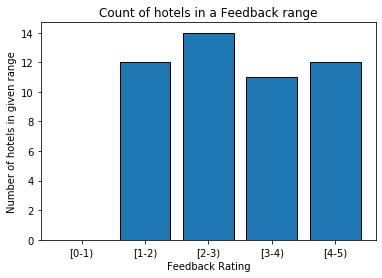

Text(0.5, 1.0, 'Count of hotels in a Feedback range')

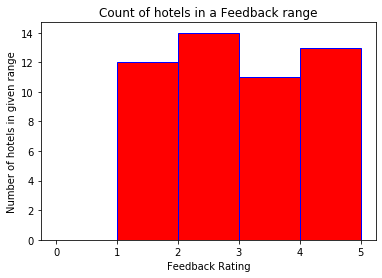

In [17]:
# Solution to Q5

# Method 1:- Using Bar Graph

# with this following code I'm generating count of all the hotels that follow the condition specified
# in the question
a=df3[(df3['Feedback']>=0) & (df3['Feedback']<1)].count().to_numpy()[0]
b=df3[(df3['Feedback']>=1) & (df3['Feedback']<2)].count().to_numpy()[0]
c=df3[(df3['Feedback']>=2) & (df3['Feedback']<3)].count().to_numpy()[0]
d=df3[(df3['Feedback']>=3) & (df3['Feedback']<4)].count().to_numpy()[0]
e=df3[(df3['Feedback']>=4) & (df3['Feedback']<5)].count().to_numpy()[0]
height=[a,b,c,d,e]
arr=['[0-1)','[1-2)','[2-3)','[3-4)','[4-5)']
plt.bar(arr,height,edgecolor='black')
plt.xlabel('Feedback Rating')
plt.ylabel('Number of hotels in given range')
plt.title('Count of hotels in a Feedback range')
plt.show()

# Method 2:- Using Histogram
# bins in histogram include first value and exclude second value by default i.e. [low,high) 
plt.hist(df3['Feedback'], bins=[0,1,2,3,4,5], color='red', edgecolor='b')
plt.xlabel('Feedback Rating')
plt.ylabel('Number of hotels in given range')
plt.title('Count of hotels in a Feedback range')

### Q6. Find out the relationship between feedback rating and category of the hotel. Explain it by visualize the graph for the same.

#### Soln:- I've used pearson correlation to find out relationship between 2 quantities and finally used scatter plot to visualize the same. 0 pearson coefficient means that quantities are not related, as the feedback rating and category of hotel both are randomly generated there is no specific relationship between them.

0.16228602399653635


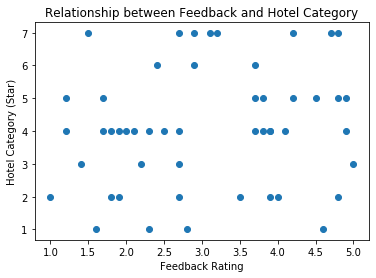

In [18]:
# Solution to Q6

# To find relationship between feedback and hotel category pearson correlation can be used 
a=df3['Feedback'].to_numpy()
b=df3['Hotel_Category'].to_numpy()
l=[]
for i in range(len(b)):
    x,_=b[i].split()
    l.append(int(x))
l=np.array(l)
corr,_=pr(a,l)
print(corr)
# As we can see that value is very near to zero and negative which indicates that there is no relationship between this 
# quantities as data is randomly generated also we can visualize it through a scatter plot
plt.scatter(a,l)
plt.xlabel('Feedback Rating')
plt.ylabel('Hotel Category (Star)')
plt.title('Relationship between Feedback and Hotel Category')
plt.show()